<a href="https://colab.research.google.com/github/southeastwind13/deep_learning/blob/main/6_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Make a mock data
N = 1000
X = np.random.random((N, 2)) * 6 - 3      # Uniform distrubution between (-3, +3)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:,1])    # y = cose(2x_1) + cose(3x_2)

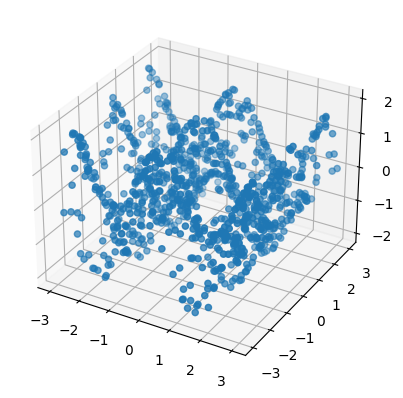

In [ ]:
# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

In [ ]:
# Build the model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Train the model
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
  # Stuff to store
  train_losses = np.zeros(epochs)

  for epoch in range(epochs):
    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backward pass
    loss.backward()

    # Update the parameters
    optimizer.step()

    # Store the loss
    train_losses[epoch] = loss.item()

    if (epoch+1) % 50 == 0:
      print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

  return train_losses

In [ ]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32)).reshape(-1, 1)

train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch [50/1000], Loss: 0.6106
Epoch [100/1000], Loss: 0.3052
Epoch [150/1000], Loss: 0.1643
Epoch [200/1000], Loss: 0.0675
Epoch [250/1000], Loss: 0.0198
Epoch [300/1000], Loss: 0.0091
Epoch [350/1000], Loss: 0.0063
Epoch [400/1000], Loss: 0.0091
Epoch [450/1000], Loss: 0.0045
Epoch [500/1000], Loss: 0.0041
Epoch [550/1000], Loss: 0.0098
Epoch [600/1000], Loss: 0.0038
Epoch [650/1000], Loss: 0.0036
Epoch [700/1000], Loss: 0.0040
Epoch [750/1000], Loss: 0.0034
Epoch [800/1000], Loss: 0.0033
Epoch [850/1000], Loss: 0.0158
Epoch [900/1000], Loss: 0.0034
Epoch [950/1000], Loss: 0.0031
Epoch [1000/1000], Loss: 0.0031


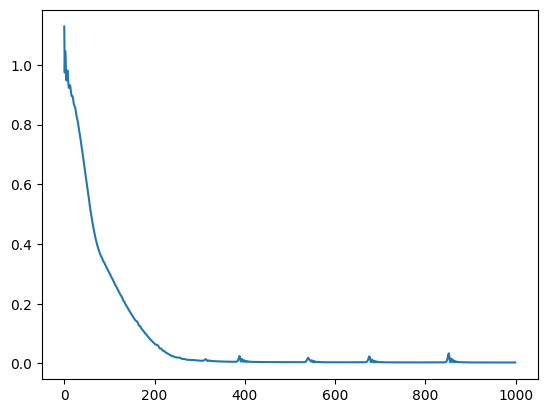

In [ ]:
plt.plot(train_losses)

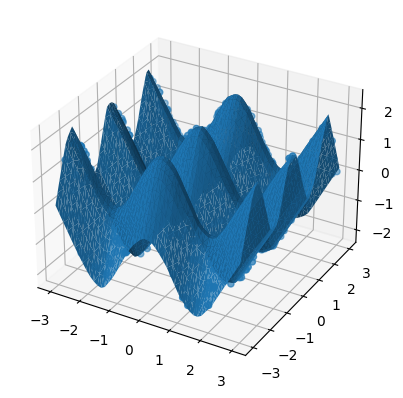

In [ ]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# Surface plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()

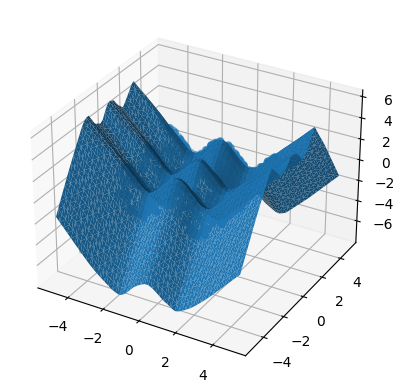

In [ ]:
# Can it extrapolate?
# - No it doen't know the periodic pattern then when we extend the length, it will keep extend the graph from the previose shape.
# - Becuase neural network doesn't use the preiodic activation function

# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# Surface plot
with torch.no_grad():
  line = np.linspace(-5, 5, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()
